2019年  4月 24日 水曜日 14:43:59 JST
Running with PyMC3 version v.3.6
3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]

Total number of epicurves: 82
report
WHO_AFRO    (34,)
WHO_DON     (33,)
WHO_OEW     (15,)
Name: report, dtype: object


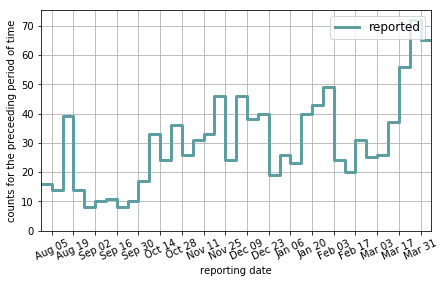

In [1]:
%run ./Initialization.ipynb
set_plot_style(usetex=True)

### All data files

In [2]:
statfiles = !ls "../results" | grep -E 'stats' | grep -E 'type'
statfiles

['forecast_noswitch-type0-npoints0-shift0-stats.csv',
 'forecast_noswitch-type1-npoints1-shift0-stats.csv',
 'forecast_noswitch-type1-npoints2-shift0-stats.csv',
 'forecast_noswitch-type1-npoints3-shift0-stats.csv',
 'forecast_noswitch-type1-npoints4-shift0-stats.csv',
 'forecast_noswitch-type2-npoints1-shift0-stats.csv',
 'forecast_noswitch-type2-npoints2-shift0-stats.csv',
 'forecast_noswitch-type2-npoints3-shift0-stats.csv',
 'forecast_noswitch-type2-npoints4-shift0-stats.csv',
 'forecast-type0-npoints0-shift0-stats.csv',
 'forecast-type1-npoints1-shift0-stats.csv',
 'forecast-type1-npoints2-shift0-stats.csv',
 'forecast-type1-npoints3-shift0-stats.csv',
 'forecast-type1-npoints4-shift0-stats.csv',
 'forecast-type2-npoints1-shift0-stats.csv',
 'forecast-type2-npoints2-shift0-stats.csv',
 'forecast-type2-npoints3-shift0-stats.csv',
 'forecast-type2-npoints4-shift0-stats.csv',
 'forecast-type5-npoints0-shift0-stats.csv']

In [3]:
df_stats = pd.DataFrame({'filename': statfiles})
df_stats['shift'] = [x[0] for x in df_stats.filename.str.split('-shift',expand=True)[1]]
df_stats['type'] = df_stats.filename.str.split('-shift',expand=True)[0].str.split('-type',expand=True)[1]
df_stats['type'] = [x[0] if len(x)==1 else x[:2]+x[-1] for x in df_stats.type]
df_stats['switch'] = ['noswitch' not in x for x in df_stats.filename]
df_stats#.set_index(['type','shift'])

,filename,shift,type,switch
0,forecast_noswitch-type0-npoints0-shift0-stats.csv,0,0-0,False
1,forecast_noswitch-type1-npoints1-shift0-stats.csv,0,1-1,False
2,forecast_noswitch-type1-npoints2-shift0-stats.csv,0,1-2,False
3,forecast_noswitch-type1-npoints3-shift0-stats.csv,0,1-3,False
4,forecast_noswitch-type1-npoints4-shift0-stats.csv,0,1-4,False
5,forecast_noswitch-type2-npoints1-shift0-stats.csv,0,2-1,False
6,forecast_noswitch-type2-npoints2-shift0-stats.csv,0,2-2,False
7,forecast_noswitch-type2-npoints3-shift0-stats.csv,0,2-3,False
8,forecast_noswitch-type2-npoints4-shift0-stats.csv,0,2-4,False
9,forecast-type0-npoints0-shift0-stats.csv,0,0-0,True


In [4]:
df_stats0 = df_stats.copy()

# Table 3

In [5]:
df_Table3 = pd.DataFrame({'type': ['0-0','1-1','1-2','1-3','2-2','2-3','2-4'], 
              'modelname': ['Lower boundary', 'Last value of Reff', 'Average over last two',
                'Average over last three', 'Linear approximation', 'Quadratic polynomial', 'Cubic polynomial']})
df_Table3['shift'] = '0'
df_Table3['switch'] = True
df_Table3 = df_Table3.merge(df_stats,how='left')

In [6]:
for idx,flnm in enumerate(df_Table3.filename):
    df_ = pd.read_csv('../results/'+flnm).rename(columns={'Unnamed: 0': 'epicurve'})
    df_['filename'] = flnm
    out = df_ if idx==0 else pd.concat([out,df_])
df_Table3 = df_Table3.merge(out,how='left')#.set_index(['type','shift'])
df_Table3[:5]

,type,modelname,shift,switch,filename,epicurve,RMSE_abs,RMSE_rel,avr_score__1,avr_score__2,log_score,avr_score,logp,AIC,AICc,bias,coverage__1,coverage__2
0,0-0,Lower boundary,0,True,forecast-type0-npoints0-shift0-stats.csv,2019-01-06,23.600847,0.540520,0.3427,0.0000,-inf,0.000000,-42.612359,93.224718,79.891384,-0.431709,Yes,No
1,0-0,Lower boundary,0,True,forecast-type0-npoints0-shift0-stats.csv,2018-12-16,13.152946,0.302315,0.0236,0.0177,-3.890350,0.020438,-14.396102,36.792203,23.458870,-0.289892,No,No
2,0-0,Lower boundary,0,True,forecast-type0-npoints0-shift0-stats.csv,2018-11-25,24.909837,0.441914,0.3712,0.0000,-inf,0.000000,-36.461214,80.922427,67.589094,-0.277209,Yes,No
3,0-0,Lower boundary,0,True,forecast-type0-npoints0-shift0-stats.csv,2018-10-28,16.552945,0.396233,0.1963,0.0020,-3.921360,0.019814,-23.090298,54.180595,40.847262,-0.348410,Yes,No
4,0-0,Lower boundary,0,True,forecast-type0-npoints0-shift0-stats.csv,2018-10-07,6.403124,0.144644,0.1630,0.1579,-1.829899,0.160430,-7.476707,22.953414,9.620080,-0.108742,Yes,Yes


In [7]:
df_Table3 = df_Table3.loc[:,['AICc','epicurve']].groupby('epicurve').min().rename(columns={'AICc':'AICmin'}).reset_index()\
    .merge(df_Table3,how='right')
df_Table3['ΔAICc'] = df_Table3.AICc - df_Table3.AICmin
df_Table3['w'] = np.exp(-df_Table3.ΔAICc/2)
df_Table3 = df_Table3.loc[:,['w','epicurve']].groupby('epicurve').sum().rename(columns={'w':'wSum'}).reset_index()\
    .merge(df_Table3,how='right')
df_Table3.w = df_Table3.w/df_Table3.wSum
df_Table3 = df_Table3.rename(columns={'w':'weight'}).drop(['AICmin','wSum','ΔAICc'],1)
df_Table3

,epicurve,type,modelname,shift,switch,filename,RMSE_abs,RMSE_rel,avr_score__1,avr_score__2,log_score,avr_score,logp,AIC,AICc,bias,coverage__1,coverage__2,weight
0,2018-09-16,0-0,Lower boundary,0,True,forecast-type0-npoints0-shift0-stats.csv,7.280110,0.768586,0.2545,0.0122,-2.887387,0.055722,-20.920117,49.840234,36.506901,-0.712984,Yes,No,2.033369e-07
1,2018-09-16,1-1,Last value of Reff,0,True,forecast-type1-npoints1-shift0-stats.csv,5.099020,0.352828,0.4347,0.2392,-1.131777,0.322460,-8.755717,25.511434,12.178101,-0.349485,Yes,Yes,3.900749e-02
2,2018-09-16,1-2,Average over last two,0,True,forecast-type1-npoints2-shift0-stats.csv,4.123106,0.257181,0.5025,0.3396,-0.884073,0.413097,-6.739133,21.478266,8.144933,-0.252575,Yes,Yes,2.930484e-01
3,2018-09-16,1-3,Average over last three,0,True,forecast-type1-npoints3-shift0-stats.csv,3.535534,0.213169,0.5349,0.3734,-0.805390,0.446913,-5.915917,19.831835,6.498502,-0.212984,Yes,Yes,6.675093e-01
4,2018-09-16,2-2,Linear approximation,0,True,forecast-type2-npoints2-shift0-stats.csv,6.670832,0.578795,0.3128,0.1451,-1.546262,0.213043,-14.988645,37.977291,24.643957,-0.562469,Yes,Yes,7.659874e-05
5,2018-09-16,2-3,Quadratic polynomial,0,True,forecast-type2-npoints3-shift0-stats.csv,6.670832,0.578795,0.2829,0.1035,-1.765423,0.171114,-14.988645,37.977291,24.643957,-0.562469,Yes,Yes,7.659874e-05
6,2018-09-16,2-4,Cubic polynomial,0,True,forecast-type2-npoints4-shift0-stats.csv,6.324555,0.538135,0.3166,0.1280,-1.602921,0.201308,-13.687189,35.374378,22.041044,-0.500000,Yes,Yes,2.814732e-04
7,2018-10-07,0-0,Lower boundary,0,True,forecast-type0-npoints0-shift0-stats.csv,6.403124,0.144644,0.1630,0.1579,-1.829899,0.160430,-7.476707,22.953414,9.620080,-0.108742,Yes,Yes,1.000000e+00
8,2018-10-07,1-1,Last value of Reff,0,True,forecast-type1-npoints1-shift0-stats.csv,78.946184,0.538901,0.1332,0.0091,-3.357692,0.034816,-76.492740,160.985479,147.652146,0.442411,Yes,No,1.063452e-30
9,2018-10-07,1-2,Average over last two,0,True,forecast-type1-npoints2-shift0-stats.csv,48.414874,0.418000,0.1505,0.0141,-3.077686,0.046066,-41.768392,91.536785,78.203451,0.338923,Yes,No,1.280295e-15


In [8]:
# df_Table3.set_index(['modelname','epicurve']).drop(['type','shift','switch','filename'],1)\
#     .round(1).to_csv('../tables/Table3.csv')

# Model averaging

In [9]:
df_Table3['tracename'] = ['trace'+x[8:-9]+z+'.pkl' for x,z in zip(df_Table3['filename'],df_Table3['epicurve'])]
df_Table3[:4]

,epicurve,type,modelname,shift,switch,filename,RMSE_abs,RMSE_rel,avr_score__1,avr_score__2,log_score,avr_score,logp,AIC,AICc,bias,coverage__1,coverage__2,weight,tracename
0,2018-09-16,0-0,Lower boundary,0,True,forecast-type0-npoints0-shift0-stats.csv,7.280110,0.768586,0.2545,0.0122,-2.887387,0.055722,-20.920117,49.840234,36.506901,-0.712984,Yes,No,2.033369e-07,trace-type0-npoints0-shift0-2018-09-16.pkl
1,2018-09-16,1-1,Last value of Reff,0,True,forecast-type1-npoints1-shift0-stats.csv,5.099020,0.352828,0.4347,0.2392,-1.131777,0.322460,-8.755717,25.511434,12.178101,-0.349485,Yes,Yes,3.900749e-02,trace-type1-npoints1-shift0-2018-09-16.pkl
2,2018-09-16,1-2,Average over last two,0,True,forecast-type1-npoints2-shift0-stats.csv,4.123106,0.257181,0.5025,0.3396,-0.884073,0.413097,-6.739133,21.478266,8.144933,-0.252575,Yes,Yes,2.930484e-01,trace-type1-npoints2-shift0-2018-09-16.pkl
3,2018-09-16,1-3,Average over last three,0,True,forecast-type1-npoints3-shift0-stats.csv,3.535534,0.213169,0.5349,0.3734,-0.805390,0.446913,-5.915917,19.831835,6.498502,-0.212984,Yes,Yes,6.675093e-01,trace-type1-npoints3-shift0-2018-09-16.pkl


In [10]:
for idx,snapshot in enumerate(df_Table3.epicurve.unique()):
    print(snapshot)
    df_ = df_Table3.loc[lambda d: d.epicurve==snapshot]
    nsamples_ = pm.Multinomial.dist(10000,df_.weight.values).random(size=1)
#     nsamples_ = [int(x) for x in np.cumsum(nsamples_)]
    nsamples_ = [int(x) for x in nsamples_]
    print(nsamples_)
    nsamples = np.r_[nsamples,[nsamples_]] if idx>0 else [nsamples_]

2018-09-16
[0, 387, 2966, 6643, 1, 0, 3]
2018-10-07
[10000, 0, 0, 0, 0, 0, 0]
2018-10-28
[0, 6045, 906, 3045, 4, 0, 0]
2018-11-25
[0, 5659, 656, 3685, 0, 0, 0]
2018-12-16
[1, 3397, 5867, 730, 1, 2, 2]
2019-01-06
[0, 1370, 4026, 4506, 98, 0, 0]


In [11]:
out = None; out_stats = None
for idx0,snapshot in enumerate(df_Table3.epicurve.unique()[1:]):
    print(snapshot)
    nsmpl = 0
    trace = []
    df_ = df_Table3.loc[lambda d: d.epicurve==snapshot]
    for idx in range(len(df_['tracename'])):
        with open('../results/traces/'+df_['tracename'].iloc[idx], 'rb') as f:
            data = pickle.load(f)
        # here we use the score weight from previous forecast
        if idx==0:
            print(nsamples[idx0])
        data = data[nsmpl:(nsmpl+nsamples[idx0][idx])]
        nsmpl = nsmpl+nsamples[idx0][idx]
        if len(data)>0:
            trace=data if len(trace)==0 else np.concatenate((trace,data),axis=0)
            
    Df0 = df_forecast_reports.loc[pd.to_datetime(df_forecast_reports.date)>snapshot][:forecasting_window]
    pXX = ss.scoreatpercentile(trace,[2.5,50,97.5],axis=0)
    display(pXX)
    ## FluSight score
    x_ = trace-Df0['reported'].values
    x_ = (x_>=-log_score_threshold)&(x_<=log_score_threshold)
    log_scores = np.log(np.sum(x_,0)/len(trace))
    avr_scores = np.exp(log_scores)
    log_score = np.mean(log_scores)
    avr_score = np.exp(log_score)
    ##
    p50 = pXX[1]
    logp = sum(Df0['reported']*np.log(p50)-p50-[lgamma(x+1) for x in Df0['reported']])
    nparams = 4 #if switchpoint>=0 else 2
    nsamplesize = len(Df0['reported'].values)
    AICc = 2*(nparams-logp)+2*(nparams**2+nparams)/(nsamplesize-nparams-1)
    AIC = 2*(nparams-logp)
    error_abs = p50-Df0['reported'].values
    error = np.log(p50/Df0['reported'].values)/np.log(10)
    coverage = ((Df0['reported']>=pXX[0])&(Df0['reported']<=pXX[-1]))
    df_stats_ = pd.DataFrame({'RMSE_abs': np.sqrt(np.mean(error_abs**2)),
                         'RMSE_rel': np.sqrt(np.mean(error**2)),
                         'avr_score__1': avr_scores[0],
                         'avr_score__2': avr_scores[1],
                         'log_score': log_score,
                         'avr_score': avr_score,
                         'logp': logp,
                         'AIC': AIC,
                         'AICc': AICc,
                         'bias': np.median(error),
                         'coverage__1': 'Yes' if coverage.iloc[0] else 'No',
                         'coverage__2': 'Yes' if coverage.iloc[-1] else 'No'},
                        index=[snapshot])
    
    display(df_stats_)
    
    dfp_forecast = ss.scoreatpercentile(trace,[2.5,25,50,75,97.5],axis=0)
    # next two lines are technical in order to show the additional step at the end
    dfp_forecast = np.c_[dfp_forecast,dfp_forecast[:,-1:]]
    dates_forecast = dts_epicurves[pd.to_datetime(dts_epicurves)>=snapshot][:(forecasting_window+1)]

    df_res = pd.DataFrame(dfp_forecast.T, index=dates_forecast, columns=['p2.5','p25','p50','p75','p97.5']).\
                reset_index().rename(columns={'index':'date'})
    df_res['epicurve'] = snapshot
    cols = df_res.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_res = df_res[cols]
    
    out = pd.concat([out, df_res])
    out_stats = pd.concat([out_stats,df_stats_]) 
    
    out.to_csv("../results/forecast-type5-npoints0-shift0.csv")
    out_stats.to_csv("../results/forecast-type5-npoints0-shift0-stats.csv")
    
out

2018-10-07
[   0  387 2966 6643    1    0    3]


array([[ 14.,  27.],
       [ 40.,  80.],
       [104., 335.]])

,RMSE_abs,RMSE_rel,avr_score__1,avr_score__2,log_score,avr_score,logp,AIC,AICc,bias,coverage__1,coverage__2
2018-10-07,39.90614,0.374421,0.1571,0.0201,-2.878954,0.056194,-32.937535,73.87507,60.541737,0.303212,Yes,No


2018-10-28
[10000     0     0     0     0     0     0]


array([[ 8.,  2.],
       [18.,  9.],
       [36., 20.]])

,RMSE_abs,RMSE_rel,avr_score__1,avr_score__2,log_score,avr_score,logp,AIC,AICc,bias,coverage__1,coverage__2
2018-10-28,16.552945,0.396233,0.1963,0.002,-3.92136,0.019814,-23.090298,54.180595,40.847262,-0.34841,Yes,No


2018-11-25
[   0 6045  906 3045    4    0    0]


array([[27., 19.],
       [44., 40.],
       [65., 65.]])

,RMSE_abs,RMSE_rel,avr_score__1,avr_score__2,log_score,avr_score,logp,AIC,AICc,bias,coverage__1,coverage__2
2018-11-25,14.764823,0.191024,0.0247,0.1854,-2.693096,0.067671,-11.228298,30.456597,17.123263,0.101272,No,Yes


2018-12-16
[   0 5659  656 3685    0    0    0]


array([[20.,  7.],
       [34., 21.],
       [53., 45.]])

,RMSE_abs,RMSE_rel,avr_score__1,avr_score__2,log_score,avr_score,logp,AIC,AICc,bias,coverage__1,coverage__2
2018-12-16,4.472136,0.058613,0.2284,0.224,-1.486383,0.226189,-5.760177,19.520353,6.18702,-0.013558,Yes,Yes


2019-01-06
[   1 3397 5867  730    1    2    2]


array([[14.,  9.],
       [25., 19.],
       [40., 35.]])

,RMSE_abs,RMSE_rel,avr_score__1,avr_score__2,log_score,avr_score,logp,AIC,AICc,bias,coverage__1,coverage__2
2019-01-06,14.916434,0.230042,0.4016,0.0146,-2.569516,0.076573,-14.115612,36.231224,22.897891,-0.143547,Yes,No


,epicurve,date,p2.5,p25,p50,p75,p97.5
0,2018-10-07,2018-10-07,14.0,28.0,40.0,55.0,104.0
1,2018-10-07,2018-10-14,27.0,54.0,80.0,124.0,335.0
2,2018-10-07,2018-10-21,27.0,54.0,80.0,124.0,335.0
0,2018-10-28,2018-10-28,8.0,14.0,18.0,23.0,36.0
1,2018-10-28,2018-11-04,2.0,6.0,9.0,12.0,20.0
2,2018-10-28,2018-11-11,2.0,6.0,9.0,12.0,20.0
0,2018-11-25,2018-11-25,27.0,38.0,44.0,51.0,65.0
1,2018-11-25,2018-12-02,19.0,32.0,40.0,48.0,65.0
2,2018-11-25,2018-12-09,19.0,32.0,40.0,48.0,65.0
0,2018-12-16,2018-12-16,20.0,28.0,34.0,40.0,53.0


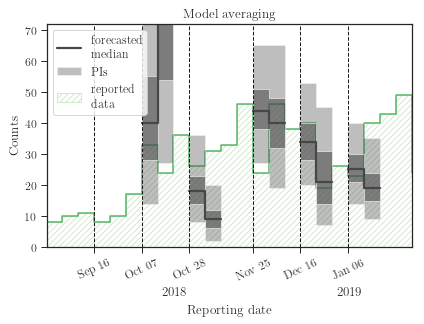

In [12]:
clr = sns.color_palette("Greys", 8)[6]
clr0_ = sns.color_palette("Greens", 8)[1]
clr1_ = sns.color_palette("Greens", 6)[3]

xtks = pd.to_datetime(df_Table3.epicurve.unique())
xmin = min(xtks)-np.timedelta64(21,'D')
xmax = max(xtks)+np.timedelta64(28,'D')

fig, ax = plt.subplots()
fig.set_size_inches(6,4.75)
for idx, epicurve in enumerate(out.epicurve.unique()):
    dfp_forecast = out[out.epicurve==epicurve]
    dates_forecast = dfp_forecast.date.get_values()
    ax.step(dates_forecast,dfp_forecast['p50'],lw=2.2,where='post',color=clr,\
            label="_nolegend_" if idx else "forecasted\nmedian");
    ax.fill_between(dates_forecast,dfp_forecast['p2.5'],dfp_forecast['p97.5'],facecolor=clr, alpha=.35, step='post',\
            label="_nolegend_" if idx else "PIs")
    ax.fill_between(dates_forecast,dfp_forecast['p25'],dfp_forecast['p75'],facecolor=clr, alpha=.55, step='post',\
            label="_nolegend_" if idx else "_nolegend_")
for epicurve in xtks:
    plt.axvline(x=epicurve,lw=1,color='k',linestyle='dashed',zorder=2)

# data
ax.step(dts_for_forecast_reported, confirmed_for_forecast_reported, 
        lw=1.5,where='pre',label="_nolegend_",zorder=-1,color=clr1_)
ax.fill_between(dts_for_forecast_reported, confirmed_for_forecast_reported, 
                edgecolor=clr0_, facecolor='none', zorder=-1, hatch = '////', step='pre', 
                label='reported\ndata')

# plot layout
ax.set_xticks(xtks)
ax.set_xlim(xmin,xmax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ttl = "Model averaging"
ax.set_title(ttl)
ax.set_xlabel("Reporting date")
ax.set_ylabel("Counts")
ax.set_ylim(0,72)
ax.legend(fontsize=12, loc=2)
fig.autofmt_xdate(rotation=25,ha='center')
ax.annotate('2019', (0,0), (290, -38), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=13)
ax.annotate('2018', (0,0), (115, -38), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=13)
ax.xaxis.labelpad = 20
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../figures/draft/FigForecast-type5-npoints0-shift0.pdf",format='pdf',bbox_inches='tight')
plt.show()

In [13]:
df_Table3_ = pd.DataFrame({'type': ['5-0'], 
              'modelname': ['Model averaging']})
df_Table3_['shift'] = '0'
df_Table3_['switch'] = True
df_Table3_['filename'] = 'forecast-type5-npoints0-shift0-stats.csv'
df_Table3_

,type,modelname,shift,switch,filename
0,5-0,Model averaging,0,True,forecast-type5-npoints0-shift0-stats.csv


In [14]:
flnm = df_Table3_['filename'].iloc[0]
df_ = pd.read_csv('../results/'+flnm).rename(columns={'Unnamed: 0': 'epicurve'})
df_['filename'] = flnm
df_

,epicurve,RMSE_abs,RMSE_rel,avr_score__1,avr_score__2,log_score,avr_score,logp,AIC,AICc,bias,coverage__1,coverage__2,filename
0,2018-10-07,39.906140,0.374421,0.1571,0.0201,-2.878954,0.056194,-32.937535,73.875070,60.541737,0.303212,Yes,No,forecast-type5-npoints0-shift0-stats.csv
1,2018-10-28,16.552945,0.396233,0.1963,0.0020,-3.921360,0.019814,-23.090298,54.180595,40.847262,-0.348410,Yes,No,forecast-type5-npoints0-shift0-stats.csv
2,2018-11-25,14.764823,0.191024,0.0247,0.1854,-2.693096,0.067671,-11.228298,30.456597,17.123263,0.101272,No,Yes,forecast-type5-npoints0-shift0-stats.csv
3,2018-12-16,4.472136,0.058613,0.2284,0.2240,-1.486383,0.226189,-5.760177,19.520353,6.187020,-0.013558,Yes,Yes,forecast-type5-npoints0-shift0-stats.csv
4,2019-01-06,14.916434,0.230042,0.4016,0.0146,-2.569516,0.076573,-14.115612,36.231224,22.897891,-0.143547,Yes,No,forecast-type5-npoints0-shift0-stats.csv


In [15]:
df_Table3_ = df_Table3_.merge(df_,how='left')
df_Table3_

,type,modelname,shift,switch,filename,epicurve,RMSE_abs,RMSE_rel,avr_score__1,avr_score__2,log_score,avr_score,logp,AIC,AICc,bias,coverage__1,coverage__2
0,5-0,Model averaging,0,True,forecast-type5-npoints0-shift0-stats.csv,2018-10-07,39.906140,0.374421,0.1571,0.0201,-2.878954,0.056194,-32.937535,73.875070,60.541737,0.303212,Yes,No
1,5-0,Model averaging,0,True,forecast-type5-npoints0-shift0-stats.csv,2018-10-28,16.552945,0.396233,0.1963,0.0020,-3.921360,0.019814,-23.090298,54.180595,40.847262,-0.348410,Yes,No
2,5-0,Model averaging,0,True,forecast-type5-npoints0-shift0-stats.csv,2018-11-25,14.764823,0.191024,0.0247,0.1854,-2.693096,0.067671,-11.228298,30.456597,17.123263,0.101272,No,Yes
3,5-0,Model averaging,0,True,forecast-type5-npoints0-shift0-stats.csv,2018-12-16,4.472136,0.058613,0.2284,0.2240,-1.486383,0.226189,-5.760177,19.520353,6.187020,-0.013558,Yes,Yes
4,5-0,Model averaging,0,True,forecast-type5-npoints0-shift0-stats.csv,2019-01-06,14.916434,0.230042,0.4016,0.0146,-2.569516,0.076573,-14.115612,36.231224,22.897891,-0.143547,Yes,No


In [16]:
pd.concat([df_Table3.drop(['tracename'],1),df_Table3_]).sort_values('epicurve')\
    .set_index(['modelname','epicurve']).drop(['type','shift','switch','filename'],1)\
    .round(1).to_csv('../tables/Table3.csv')

# Overall statistics

In [17]:
df_stats = pd.DataFrame({'filename': statfiles})
df_stats['shift'] = [x[0] for x in df_stats.filename.str.split('-shift',expand=True)[1]]
df_stats['type'] = df_stats.filename.str.split('-shift',expand=True)[0].str.split('-type',expand=True)[1]
df_stats['type'] = [x[0] if len(x)==1 else x[:2]+x[-1] for x in df_stats.type]
df_stats['switch'] = ['noswitch' not in x for x in df_stats.filename]
df_stats#.set_index(['type','shift'])

,filename,shift,type,switch
0,forecast_noswitch-type0-npoints0-shift0-stats.csv,0,0-0,False
1,forecast_noswitch-type1-npoints1-shift0-stats.csv,0,1-1,False
2,forecast_noswitch-type1-npoints2-shift0-stats.csv,0,1-2,False
3,forecast_noswitch-type1-npoints3-shift0-stats.csv,0,1-3,False
4,forecast_noswitch-type1-npoints4-shift0-stats.csv,0,1-4,False
5,forecast_noswitch-type2-npoints1-shift0-stats.csv,0,2-1,False
6,forecast_noswitch-type2-npoints2-shift0-stats.csv,0,2-2,False
7,forecast_noswitch-type2-npoints3-shift0-stats.csv,0,2-3,False
8,forecast_noswitch-type2-npoints4-shift0-stats.csv,0,2-4,False
9,forecast-type0-npoints0-shift0-stats.csv,0,0-0,True


In [18]:
for idx,flnm in enumerate(df_stats.filename):
    df_ = pd.read_csv('../results/'+flnm).rename(columns={'Unnamed: 0': 'index'}).set_index('index')
    out_ = pd.DataFrame({'epicurve': [df_.index.values],
                         'RMSE_rel': [df_.RMSE_rel.values],
                         'bias': [df_.bias.values],
                         'logp': [df_.logp.values],
                         'AIC': [df_.AIC.values],
                         'AICc': [df_.AICc.values],
                         'score': [df_.avr_score.values], 
                         'filename': flnm})
    out = out_ if idx==0 else pd.concat([out,out_])
out = out.reset_index(drop=True)
out[:1]

,epicurve,RMSE_rel,bias,logp,AIC,AICc,score,filename
0,"[2018-09-16, 2018-10-07, 2018-10-28, 2018-11-2...","[0.7685861568079579, 0.6454316618275295, 0.467...","[-0.7129843661361405, -0.6276362525516529, -0....","[-20.920117166475887, -42.43758774647024, -28....","[45.84023433295177, 88.87517549294046, 60.9505...","[33.840234332951766, 76.87517549294046, 48.950...","[0.03877537878602863, 0.0, 0.0, 0.005492722457...",forecast_noswitch-type0-npoints0-shift0-stats.csv


In [19]:
df_stats = df_stats.merge(out,how='left').set_index(['type','shift'])
df_stats

,,filename,switch,epicurve,RMSE_rel,bias,logp,AIC,AICc,score
type,shift,,,,,,,,,
0-0,0,forecast_noswitch-type0-npoints0-shift0-stats.csv,False,"[2018-09-16, 2018-10-07, 2018-10-28, 2018-11-2...","[0.7685861568079579, 0.6454316618275295, 0.467...","[-0.7129843661361405, -0.6276362525516529, -0....","[-20.920117166475887, -42.43758774647024, -28....","[45.84023433295177, 88.87517549294046, 60.9505...","[33.840234332951766, 76.87517549294046, 48.950...","[0.03877537878602863, 0.0, 0.0, 0.005492722457..."
1-1,0,forecast_noswitch-type1-npoints1-shift0-stats.csv,False,"[2018-09-16, 2018-10-07, 2018-10-28, 2018-11-2...","[0.3162445397325908, 0.16999901367272136, 0.10...","[-0.30102999566398114, -0.11101578598231343, -...","[-7.970568565149055, -9.419690306364501, -6.84...","[19.94113713029811, 22.839380612729002, 17.681...","[7.941137130298109, 10.839380612729, 5.6816756...","[0.31003662686850403, 0.15149851484420565, 0.2..."
1-2,0,forecast_noswitch-type1-npoints2-shift0-stats.csv,False,"[2018-09-16, 2018-10-07, 2018-10-28, 2018-11-2...","[0.230465557290818, 0.15573642801607826, 0.056...","[-0.21298436613614047, -0.09136091897734716, 0...","[-6.28056059765532, -8.785714475896555, -5.715...","[16.56112119531064, 21.57142895179311, 15.4302...","[4.5611211953106405, 9.57142895179311, 3.43029...","[0.4139456486061908, 0.16186636463453424, 0.29..."
1-3,0,forecast_noswitch-type1-npoints3-shift0-stats.csv,False,"[2018-09-16, 2018-10-07, 2018-10-28, 2018-11-2...","[0.230465557290818, 0.1695361615134938, 0.0297...","[-0.21298436613614047, -0.11988016946252925, 0...","[-6.28056059765532, -9.39941817485061, -5.3248...","[16.56112119531064, 22.79883634970122, 14.6497...","[4.5611211953106405, 10.79883634970122, 2.6497...","[0.4439012390160676, 0.14474695160866086, 0.33..."
1-4,0,forecast_noswitch-type1-npoints4-shift0-stats.csv,False,"[2018-09-16, 2018-10-07, 2018-10-28, 2018-11-2...","[0.2571808951000361, 0.19437814011333, 0.10143...","[-0.25257498915995297, -0.17121134041110309, 0...","[-6.739133052006958, -10.559353839824622, -6.9...","[17.478266104013915, 25.118707679649248, 17.89...","[5.478266104013915, 13.118707679649248, 5.8990...","[0.3825221431499097, 0.11508405623716955, 0.23..."
2-1,0,forecast_noswitch-type2-npoints1-shift0-stats.csv,False,"[2018-09-16, 2018-10-07, 2018-10-28, 2018-11-2...","[0.3162445397325908, 0.15429448332454207, 0.10...","[-0.30102999566398114, -0.09987758862673732, -...","[-7.970568565149055, -8.72701159157532, -6.902...","[19.94113713029811, 21.45402318315064, 17.8044...","[7.941137130298109, 9.45402318315064, 5.804419...","[0.304598276423226, 0.1443058903856665, 0.2314..."
2-2,0,forecast_noswitch-type2-npoints2-shift0-stats.csv,False,"[2018-09-16, 2018-10-07, 2018-10-28, 2018-11-2...","[0.5381347996789236, 0.18804790389189674, 0.46...","[-0.5, -0.1505149978319906, -0.391241700419002...","[-13.687188781262186, -10.271909524520822, -28...","[31.374377562524373, 24.543819049041645, 60.95...","[19.374377562524373, 12.543819049041646, 48.95...","[0.2033145838350019, 0.1152568436145984, 0.061..."
2-3,0,forecast_noswitch-type2-npoints3-shift0-stats.csv,False,"[2018-09-16, 2018-10-07, 2018-10-28, 2018-11-2...","[0.7384507628438934, 0.3763189139350238, 0.467...","[-0.6505149978319904, -0.3762985729556277, -0....","[-19.61866058686164, -21.488262306533212, -28....","[43.23732117372328, 46.976524613066424, 60.950...","[31.237321173723274, 34.976524613066424, 48.95...","[0.16953507011825014, 0.07156186135086202, 0.0..."
2-4,0,forecast_noswitch-type2-npoints4-shift0-stats.csv,False,"[2018-09-16, 2018-10-07, 2018-10-28, 2018-11-2...","[0.7384507628438934, 0.5129101254047396, 0.467...","[-0.6505149978319904, -0.5033152894495065, -0....","[-19.61866058686164, -31.193640357989796, -28....","[43.23732117372328, 66.3872807159796, 60.95059...","[31.237321173723274, 54.38728071597959, 48.950...","[0.2034096605375467, 0.05062311724894072, 0.00..."


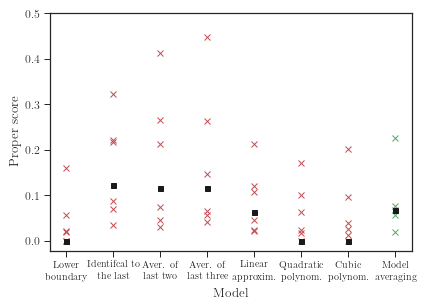

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4.5)

models_to_plot = ['0-0','1-1','1-2','1-3','2-2','2-3','2-4','5-0']
models_names = ['Lower\nboundary',
                'Identifcal to\nthe last',
                'Aver. of\nlast two',
                'Aver. of\nlast three',
                'Linear\napproxim.',
                'Quadratic\npolynom.',
                'Cubic\npolynom.',
                'Model\naveraging']
    
mrks = ['x','+']
mrks0 = ['o','s']
tks = []
ltks = []
df_stats_ = df_stats.loc[lambda d: d.switch].reset_index().set_index(['type','shift'])
for idx0,tp in enumerate(models_to_plot):
    tks = np.r_[tks,idx0+1]
    sht = '0'
    y = df_stats_.loc[tp].loc[sht].score
    x = [idx0+1]*len(y)
    ax.plot(x,y,'C3' if tp!='5-0' else 'C2',marker=mrks[0],lw=0,alpha=1,ms=6)
    ax.plot(x[:1],[gmean(y)],c='k',marker="s", ms=5)
        
ax.set_xticks(tks);
ax.set_xticklabels(models_names,rotation=0,fontsize=10);
ax.set_ylim(top=np.max(np.r_[np.max([item for sublist in df_stats_.score.values for item in sublist]),.5]))

ax.set_xlabel("Model")
ax.set_ylabel("Proper score")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../figures/draft/Fig3-only_score.pdf",format='pdf',bbox_inches='tight')

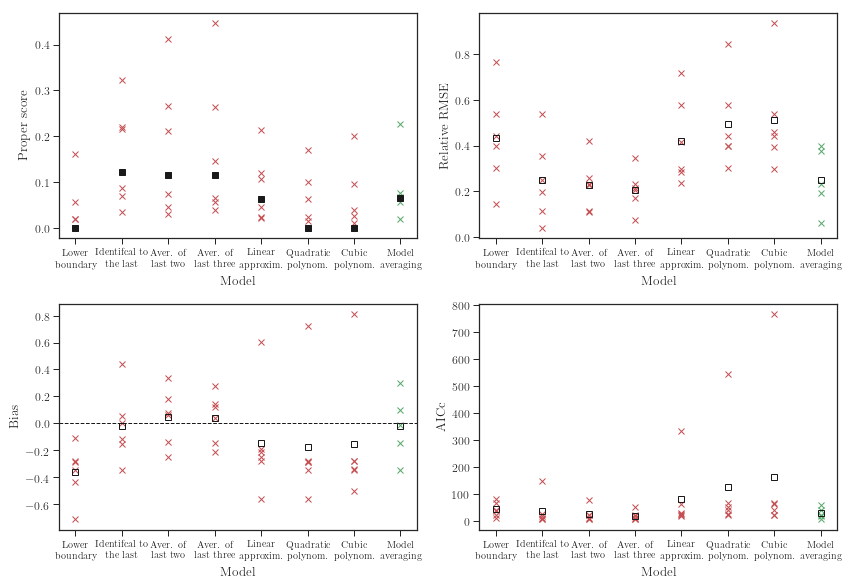

In [21]:
fig, axs = plt.subplots(2,2,sharex=False,sharey=False)
fig.set_size_inches(12,8.5)

ttls = ["Proper score","Relative RMSE","Bias","AICc"]
scores = []
for idx,var in enumerate(['score','RMSE_rel','bias','AICc']):
    ax = axs[idx//2,idx%2]

    tks = []
    ltks = []
    df_stats_ = df_stats.loc[lambda d: d.switch].reset_index().set_index(['type','shift'])
    for idx0,tp in enumerate(models_to_plot):
        tks = np.r_[tks,idx0+1]
        sht = '0'
        y = df_stats_.loc[tp].loc[sht][var]
        x = [idx0+1]*len(y)
        ax.plot(x,y,'C3' if tp!='5-0' else 'C2',marker=mrks[0],lw=0,alpha=1,ms=6)
        if var=='score':
            gmn = gmean(y)
            ax.plot(x[:1],[gmn],c='k',marker="s", fillstyle='full') 
            scores.append(gmn)
        else:
            ax.plot(x[:1],[np.mean(y)],c='k',marker="s",fillstyle='none') 
        
    if (var=='bias'):
        ax.axhline(y=0,color='k',linestyle='dashed',zorder=-12,lw=1)
        
    ax.set_xticks(tks);
    ax.set_xticklabels(models_names,rotation=0,fontsize=10);

    ax.set_xlabel("Model")
    ax.set_ylabel(ttls[idx])
    
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../figures/Fig3.pdf",format='pdf',bbox_inches='tight')
!convert -density 150 -trim ../figures/Fig3.pdf -quality 100 ../figures/pngs/Fig3.png

In [22]:
# the model with best score (except averaging)
scores = scores[:-1]

In [23]:
flnm = df_stats_.loc[(models_to_plot[np.where(scores==max(scores))[0].item()],'0')].filename
flnm

'forecast-type1-npoints1-shift0-stats.csv'

In [24]:
figfilename = 'FigForecast'+flnm[8:-10]+'.pdf'
figfilename

'FigForecast-type1-npoints1-shift0.pdf'

# Figure 4

In [25]:
%%capture
%%bash -s "$figfilename"
filename=Fig4
pdflatex <<TeXScript
\documentclass{standalone}
\usepackage{tikz,graphicx}
\usepackage[T1]{fontenc}

\begin{document}
\begin{tikzpicture}
    \node[anchor=north east] at (0in,0.15in) {\includegraphics{../figures/draft/$1}};
    \node[anchor=north west] at (0in,0.15in) {\includegraphics{../figures/draft/FigForecast-type5-npoints0-shift0.pdf}};
    \node[anchor=south east] at (-5.6in,0in) {\Large {\bf A}};
    \node[anchor=south west] at (.05in,0in) {\Large {\bf B}};
\end{tikzpicture}
\end{document}
TeXScript
mv texput.pdf ../figures/${filename}.pdf
rm texput.*
convert -density 150 -trim ../figures/${filename}.pdf -quality 100 ../figures/pngs/${filename}.png

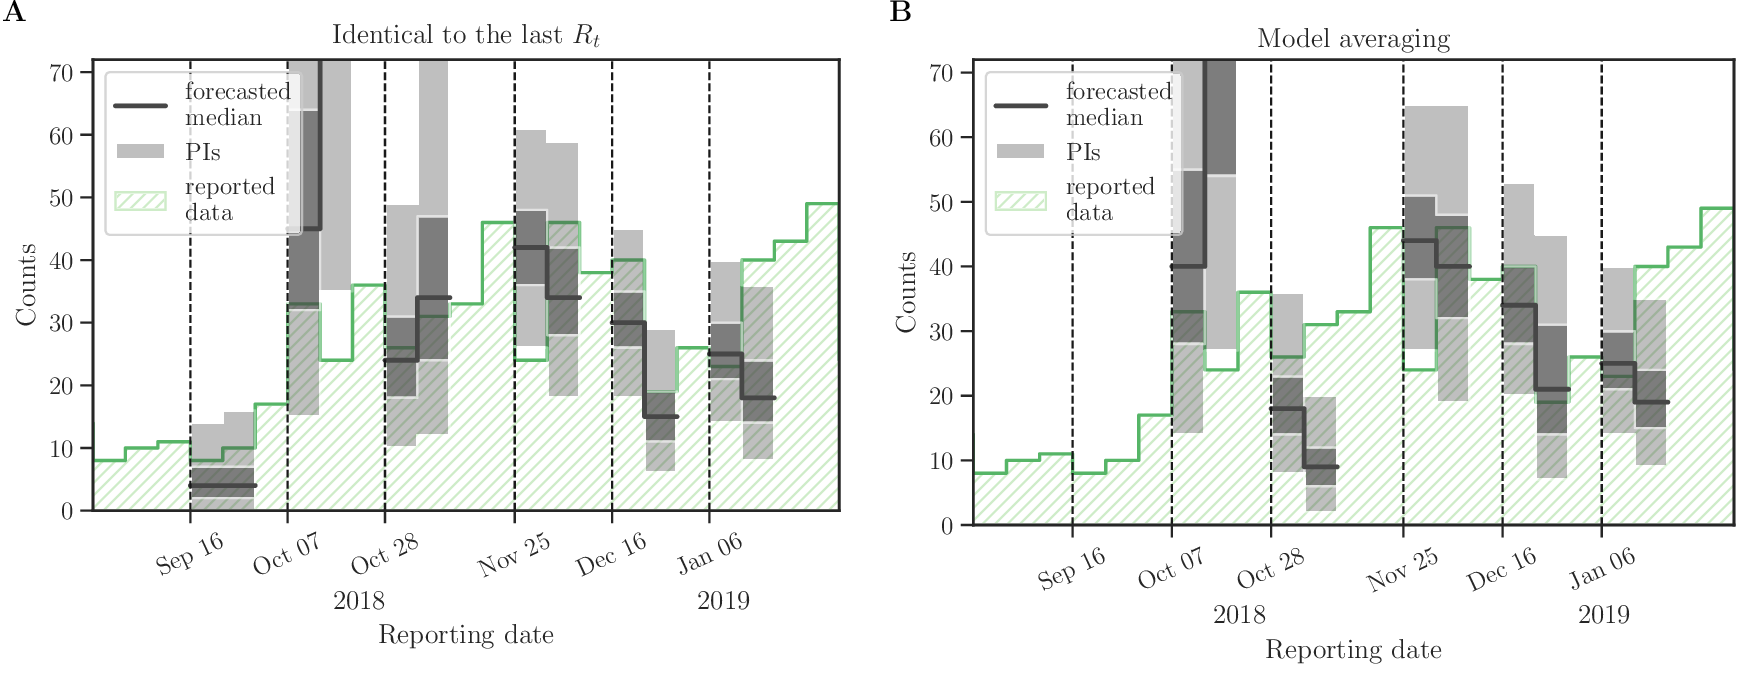

In [26]:
display(Image("../figures/pngs/Fig4.png", width="75%"))

# Generating a big supplementary figure

In [27]:
df_output = pd.DataFrame({
             'plot_titles': [r"{\bf A. Lower bound}", 
               r"{\bf B. Identical to the last $R_t$}", 
               r"{\bf C. Average of last two $R_t$}", 
               r"{\bf D. Average of last three $R_t$}", 
               r"{\bf E. Linear approximation}", 
               r"{\bf F. Quadratic polynomial}", 
               r"{\bf G. Cubic polynomial}"],
             'type': [0,1,1,1,2,2,2],
             'npoints': [0,1,2,3,2,3,4],
             'pltID': [0,1,2,3,5,6,7]})
df_output['filename'] = [('../results/forecast-type%d-npoints%d-shift0.csv'%(x,y) if x<3 else 'results/forecast-type%d-shift0.csv'%(x)) if x>=0 else 'results/forecast-lower_boundary.csv' for (x,y) in zip(df_output['type'],df_output['npoints'])]
df_output

,plot_titles,type,npoints,pltID,filename
0,{\bf A. Lower bound},0,0,0,../results/forecast-type0-npoints0-shift0.csv
1,{\bf B. Identical to the last $R_t$},1,1,1,../results/forecast-type1-npoints1-shift0.csv
2,{\bf C. Average of last two $R_t$},1,2,2,../results/forecast-type1-npoints2-shift0.csv
3,{\bf D. Average of last three $R_t$},1,3,3,../results/forecast-type1-npoints3-shift0.csv
4,{\bf E. Linear approximation},2,2,5,../results/forecast-type2-npoints2-shift0.csv
5,{\bf F. Quadratic polynomial},2,3,6,../results/forecast-type2-npoints3-shift0.csv
6,{\bf G. Cubic polynomial},2,4,7,../results/forecast-type2-npoints4-shift0.csv


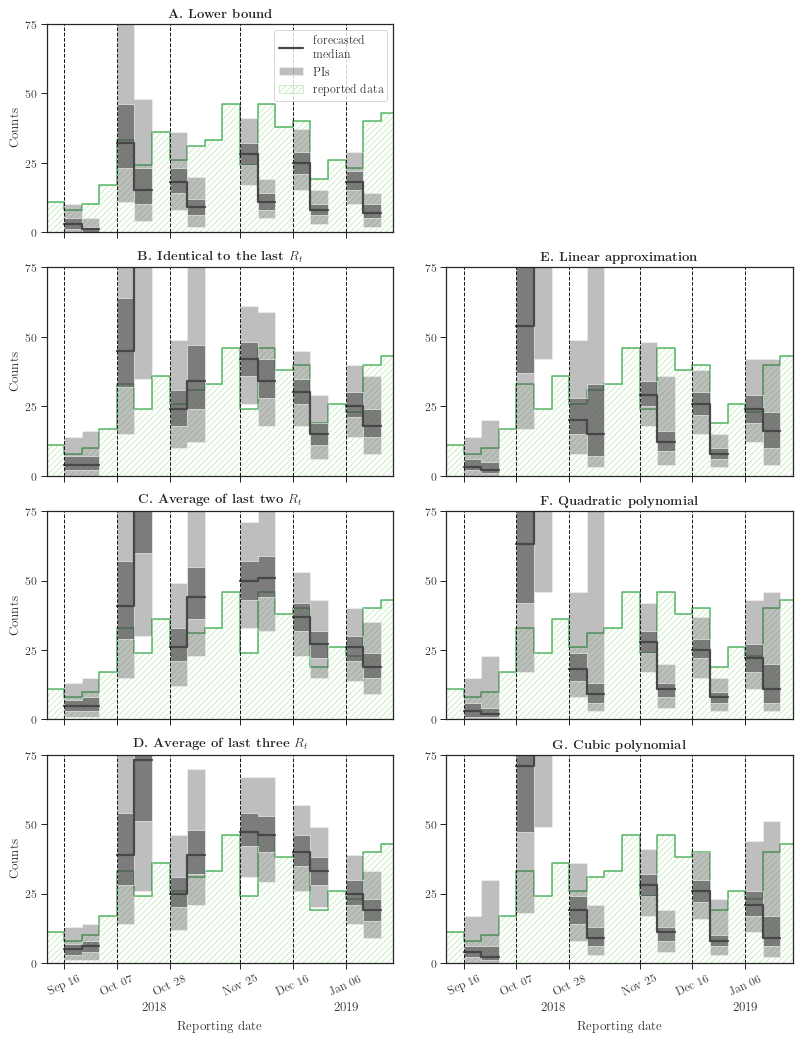

In [28]:
clr = sns.color_palette("Greys", 8)[6]
clr0_ = sns.color_palette("Greens", 8)[1]
clr1_ = sns.color_palette("Greens", 6)[3]

fig, axs = plt.subplots(4,2,sharex=True,sharey=False)
fig.set_size_inches(11.5,15)

xtks = pd.to_datetime(df_Table3.epicurve.unique())
xmin = min(xtks)-np.timedelta64(21,'D')
xmax = max(xtks)+np.timedelta64(28,'D')

for idx_ in range(df_output.shape[0]):
    out = pd.read_csv(df_output.filename.iloc[idx_]).rename(columns={'Unnamed: 0': 'index'}).set_index('index')
    out['epicurve'] = pd.to_datetime(out['epicurve'],format="%Y-%m-%d")
    out['date'] = pd.to_datetime(out['date'],format="%Y-%m-%d")

    pltID_ = df_output.pltID.iloc[idx_]
    ax = axs[pltID_%4,pltID_//4]
    for idx, epicurve in enumerate(out.epicurve.unique()):
        dfp_forecast = out[out.epicurve==epicurve]
        dates_forecast = dfp_forecast.date.get_values()
        ax.step(dates_forecast,dfp_forecast['p50'],lw=2.2,where='post',color=clr,\
                label="_nolegend_" if idx else "forecasted\nmedian");
        ax.fill_between(dates_forecast,dfp_forecast['p2.5'],dfp_forecast['p97.5'],facecolor=clr, alpha=.35, step='post',\
                label="_nolegend_" if idx else "PIs")
        ax.fill_between(dates_forecast,dfp_forecast['p25'],dfp_forecast['p75'],facecolor=clr, alpha=.55, step='post',\
                label="_nolegend_" if idx else "_nolegend_")
    for epicurve in xtks:
        ax.axvline(x=epicurve,lw=1,color='k',linestyle='dashed',zorder=2)

    # data
    ax.step(dts_for_forecast_reported, confirmed_for_forecast_reported, 
            lw=1.5,where='pre',label="_nolegend_",zorder=-1,color=clr1_)
    ax.fill_between(dts_for_forecast_reported, confirmed_for_forecast_reported, 
                    edgecolor=clr0_, facecolor='none', zorder=-1, hatch = '////', step='pre', 
                    label='reported data')
    # plot layout
    ax.set_xticks(xtks)
    ax.set_yticks(np.arange(0,80,25))
    ax.set_xlim(min(out.epicurve)-np.timedelta64(1,'W'),max(out.epicurve)+np.timedelta64(19,'D'))
    # ax.set_xlim(left=df_MOH.date.head(1).get_values()[0])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.set_title(df_output.plot_titles.iloc[idx_])
    ax.set_xlabel("Reporting date")
    if pltID_//4==0: ax.set_ylabel("Counts")
    # ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
    ax.set_ylim(0,75)

    if idx_==0: ax.legend(fontsize=12, loc=1) 

    if (pltID_==3)|(pltID_==7):
        ax.annotate('2019', (0,0), (287, -38), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=13)
        ax.annotate('2018', (0,0), (95, -38), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=13)
        ax.xaxis.labelpad = 20

axs[0,1].axis('off')

fig.autofmt_xdate(rotation=25,ha='center')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../figures/FigS2.pdf",format='pdf',bbox_inches='tight')
plt.show()
!convert -density 150 -trim ../figures/FigS2.pdf -quality 100 ../figures/pngs/FigS2.png

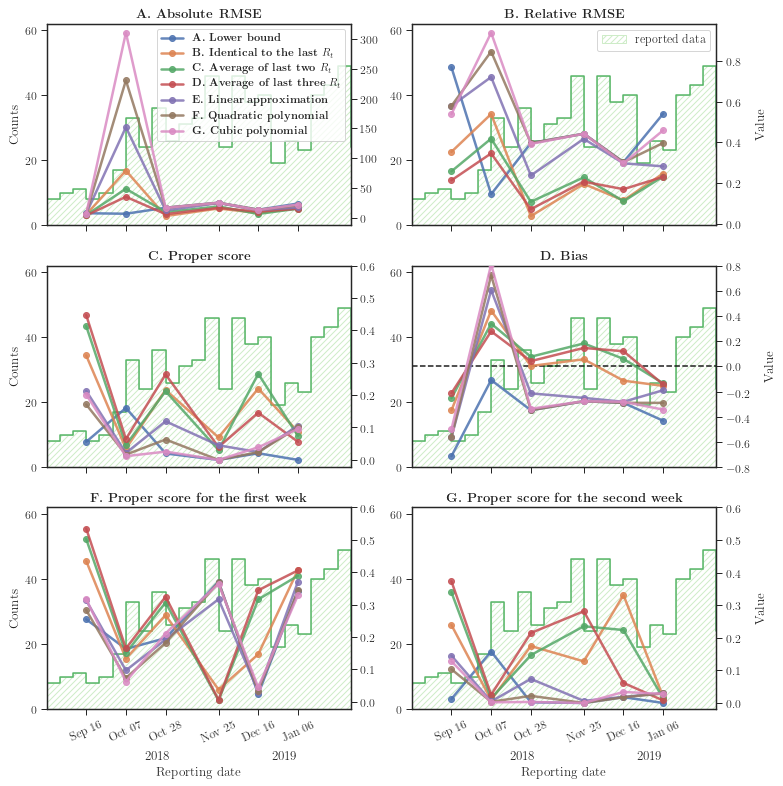

In [29]:
prop_cycle = plt.rcParams['axes.prop_cycle']
clrs = prop_cycle.by_key()['color']

fig, axs = plt.subplots(3,2,sharex=True,sharey=False)
fig.set_size_inches(12,14)

ttls = ["A. Absolute RMSE",
        "B. Relative RMSE",
        "C. Proper score",
        "D. Bias",
        "F. Proper score for the first week",
        "G. Proper score for the second week"]
for idx,var in enumerate(['RMSE_abs','RMSE_rel','avr_score','bias','avr_score__1','avr_score__2']):
    ax = axs[idx//2,idx%2]

    ax2 = ax.twinx()
    for idx_ in np.arange(len(df_output.plot_titles)):
        out = pd.read_csv(df_output.filename[idx_][:-4]+"-stats.csv").rename(columns={'Unnamed: 0': 'epicurve'})
        out['epicurve'] = pd.to_datetime(out['epicurve'],format="%Y-%m-%d")
        ax2.plot(out['epicurve'].values,out[var],lw=2.5,marker='o',label=df_output.plot_titles[idx_],c=clrs[idx_],
                 alpha=.85,zorder=idx_)

    if (var=='bias'):
        plt.axhline(y=0,color='k',linestyle='dashed',zorder=-12,lw=1.5)

    # data
    clr0_ = sns.color_palette("Greens", 8)[1]
    clr1_ = sns.color_palette("Greens", 6)[3]
    ax.step(dts_for_forecast_reported, confirmed_for_forecast_reported,lw=1.5,where='pre',label="_nolegend_",zorder=-1,color=clr1_)
    ax.fill_between(dts_for_forecast_reported, confirmed_for_forecast_reported, edgecolor=clr0_, facecolor='none', zorder=-1, hatch = '////', step='pre', 
                    label='reported data')

    # plot layout
    ax.set_xticks(xtks)
    ax.set_xlim(xmin,xmax)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.set_title(r"{\bf "+ttls[idx]+"}")
    
    ax.set_ylim(0,62)
    ax.set_yticks(np.arange(0,80,20))
    if (idx==0): ax2.legend(fontsize=11, loc="best")
    if (idx==1): ax.legend(fontsize=12, loc="best")
    fig.autofmt_xdate(rotation=25,ha='center')
    
    if (idx==3):
        ax2.set_ylim(-.8,.8)
    elif (idx>=2):
        ax2.set_ylim(top=0.6)
    
    if (idx%2==0):
        ax.set_ylabel("Counts")
    else:
        ax2.set_ylabel("Value",labelpad=12)

    if (idx//2==2):
        ax.set_xlabel("Reporting date",labelpad=20)
        ax.annotate('2019', (0,0), (225, -40), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=13)
        ax.annotate('2018', (0,0), (98, -40), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=13)

plt.savefig("../figures/FigS3.pdf",format='pdf',bbox_inches='tight')
!convert -density 150 -trim ../figures/FigS3.pdf -quality 100 ../figures/pngs/FigS3.png

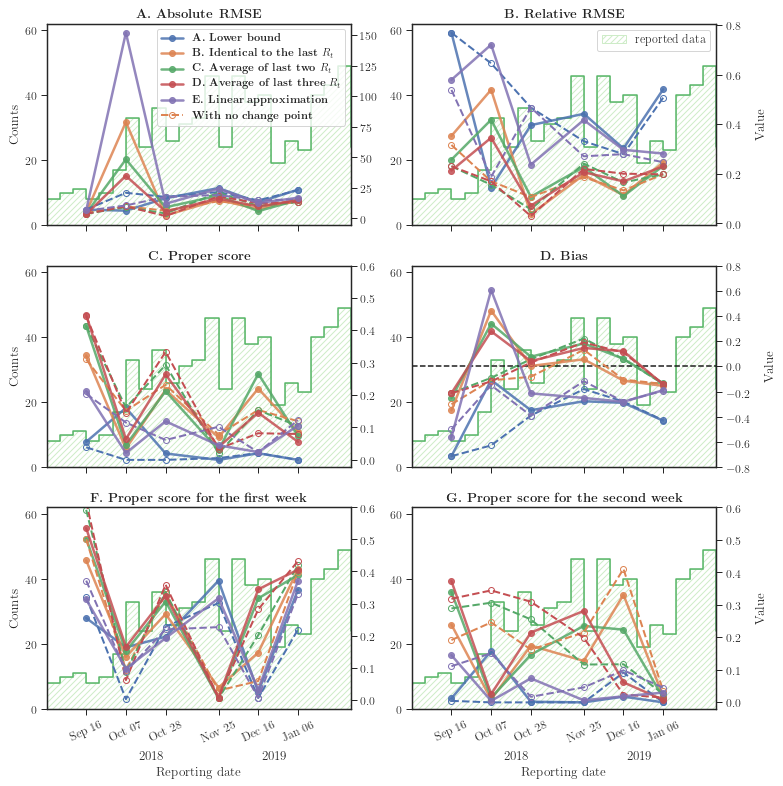

In [30]:
prop_cycle = plt.rcParams['axes.prop_cycle']
clrs = prop_cycle.by_key()['color']
# xtks = pd.date_range(start=xmin,end=xmax,freq='1D')[::14]

fig, axs = plt.subplots(3,2,sharex=True,sharey=False)
fig.set_size_inches(12,14)

ttls = ["A. Absolute RMSE",
        "B. Relative RMSE",
        "C. Proper score",
        "D. Bias",
        "F. Proper score for the first week",
        "G. Proper score for the second week"]
for idx,var in enumerate(['RMSE_abs','RMSE_rel','avr_score','bias','avr_score__1','avr_score__2']):
    ax = axs[idx//2,idx%2]

    ax2 = ax.twinx()
    for idx_ in range(len(df_output.plot_titles))[:-2]:
        out = pd.read_csv(df_output.filename.iloc[idx_][:-4]+"-stats.csv").rename(columns={'Unnamed: 0': 'epicurve'})
        out['epicurve'] = pd.to_datetime(out['epicurve'],format="%Y-%m-%d")
        ax2.plot(out['epicurve'].values,out[var],lw=2.5,marker='o',
                 label=df_output.plot_titles.iloc[idx_], c=clrs[idx_],
                 alpha=.85,zorder=idx_)
        
    for idx_ in np.arange(len(df_output.plot_titles))[:-2]:
        out = pd.read_csv("../results/forecast_noswitch"+df_output.filename[idx_][19:-4]+"-stats.csv").rename(columns={'Unnamed: 0': 'epicurve'})
        out['epicurve'] = pd.to_datetime(out['epicurve'],format="%Y-%m-%d")
        ax2.plot(out['epicurve'].values,out[var],lw=2,linestyle='dashed',marker='o', fillstyle='none',
             label=r"\bf With no change point" if idx_==1 else '_nolegend__' , c=clrs[idx_])

    if (var=='bias'):
        plt.axhline(y=0,color='k',linestyle='dashed',zorder=-12,lw=1.5)

    # data
    clr0_ = sns.color_palette("Greens", 8)[1]
    clr1_ = sns.color_palette("Greens", 6)[3]
    ax.step(dts_for_forecast_reported, confirmed_for_forecast_reported,lw=1.5,where='pre',label="_nolegend_",zorder=-1,color=clr1_)
    ax.fill_between(dts_for_forecast_reported, confirmed_for_forecast_reported, edgecolor=clr0_, facecolor='none', zorder=-1, hatch = '////', step='pre', 
                    label='reported data')

    # plot layout
    ax.set_xticks(xtks)
    ax.set_xlim(xmin,xmax)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.set_title(r"{\bf "+ttls[idx]+"}")
    
    ax.set_ylim(0,62)
    ax.set_yticks(np.arange(0,80,20))
    if (idx==0): ax2.legend(fontsize=11, loc="best")
    if (idx==1): ax.legend(fontsize=12, loc="best")
    fig.autofmt_xdate(rotation=25,ha='center')
    
    if (idx==3):
        ax2.set_ylim(-.8,.8)
    elif (idx>=2):
        ax2.set_ylim(top=0.6)
    
    if (idx%2==0):
        ax.set_ylabel("Counts")
    else:
        ax2.set_ylabel("Value",labelpad=12)

    if (idx//2==2):
        ax.set_xlabel("Reporting date",labelpad=20)
        ax.annotate('2019', (0,0), (215, -40), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=13)
        ax.annotate('2018', (0,0), (92, -40), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=13)

plt.savefig("../figures/FigS4.pdf",format='pdf',bbox_inches='tight')
!convert -density 150 -trim ../figures/FigS4.pdf -quality 100 ../figures/pngs/FigS4.png

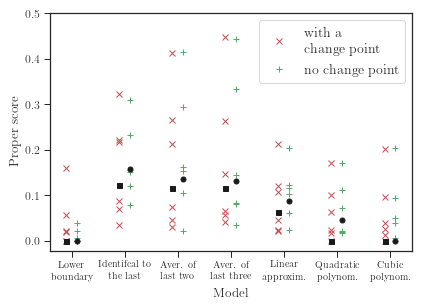

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(6,4.5)

models_to_plot = ['0-0','1-1','1-2','1-3','2-2','2-3','2-4']
models_names = ['Lower\nboundary',
                'Identifcal to\nthe last',
                'Aver. of\nlast two',
                'Aver. of\nlast three',
                'Linear\napproxim.',
                'Quadratic\npolynom.',
                'Cubic\npolynom.']
    
mrks = ['x','+']
mrks0 = ['o','s']
tks = []
ltks = []
for idx1,swtch in enumerate([True,False]):
    df_stats_ = df_stats.loc[lambda d: d.switch==swtch].reset_index().set_index(['type','shift'])
    for idx0,tp in enumerate(models_to_plot):
        tks = np.r_[tks,idx0+1]
        sht = '0'
        y = df_stats_.loc[tp].loc[sht].score
        x = [idx0+1+.2*(idx1-.5)]*len(y)
        ax.plot(x,y,'C3' if swtch else 'C2',marker=mrks[idx1],lw=0,alpha=1,ms=6,
                label=('with a\nchange point' if (idx1==0) else 'no change point') if (idx0==0) else '_nolegend_')
        ax.plot(x[:1],[gmean(y)],c='k',marker="s" if swtch else 'o', ms=5)
        
ax.set_xticks(tks);
ax.set_xticklabels(models_names,rotation=0,fontsize=10);
ax.set_ylim(top=np.max(np.r_[np.max([item for sublist in df_stats_.score.values for item in sublist]),.5]))

ax.set_xlabel("Model")
ax.set_ylabel("Proper score")
ax.legend(loc=1,frameon=True)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../figures/draft/FigS5-only_score.pdf",format='pdf',bbox_inches='tight')

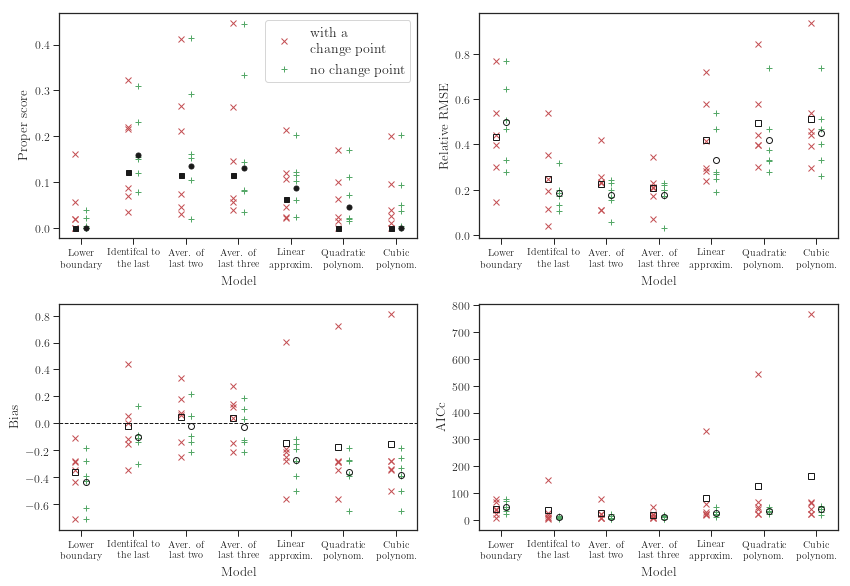

In [32]:
fig, axs = plt.subplots(2,2,sharex=False,sharey=False)
fig.set_size_inches(12,8.5)

ttls = ["Proper score","Relative RMSE","Bias","AICc"]
scores = []
for idx,var in enumerate(['score','RMSE_rel','bias','AICc']):
    ax = axs[idx//2,idx%2]

    tks = []
    ltks = []
    for idx1,swtch in enumerate([True,False]):
        df_stats_ = df_stats.loc[lambda d: d.switch==swtch].reset_index().set_index(['type','shift'])
        for idx0,tp in enumerate(models_to_plot):
            tks = np.r_[tks,idx0+1]
            sht = '0'
            y = df_stats_.loc[tp].loc[sht][var]
            x = [idx0+1+0.2*(idx1-.5)]*len(y)
            ax.plot(x,y,'C3' if swtch else 'C2',marker=mrks[idx1],lw=0,alpha=1,ms=6,
                    label=('with a\nchange point' if (idx1==0) else 'no change point') if (idx0==0) else '_nolegend_')
            if var=='score':
                gmn = gmean(y)
                ax.plot(x[:1],[gmean(y)],c='k',marker="s" if swtch else 'o', ms=5) 
                scores.append(gmn)
            else:
                ax.plot(x[:1],[np.mean(y)],c='k',marker="s" if swtch else 'o',fillstyle='none') 
        
    if (var=='bias'):
        ax.axhline(y=0,color='k',linestyle='dashed',zorder=-12,lw=1)
        
    ax.set_xticks(tks);
    ax.set_xticklabels(models_names,rotation=0,fontsize=10);

    ax.set_xlabel("Model")
    ax.set_ylabel(ttls[idx])
    
    if(idx==0):
        ax.legend(loc=1,frameon=True)
    
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../figures/FigS5.pdf",format='pdf',bbox_inches='tight')
!convert -density 150 -trim ../figures/FigS5.pdf -quality 100 ../figures/pngs/FigS5.png